In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

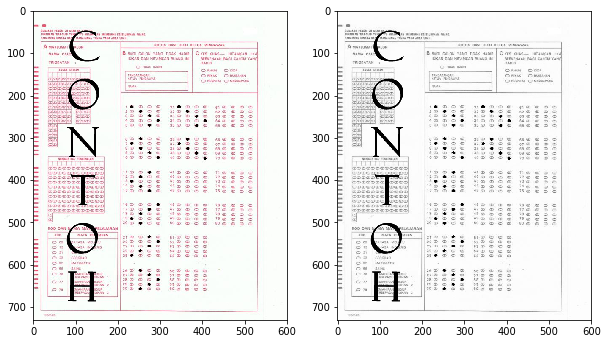

In [2]:
image = cv2.imread('a.jpg')
image2 = image.copy()

plt.figure(figsize = (10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),cmap='gray')
plt.show()

In [3]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

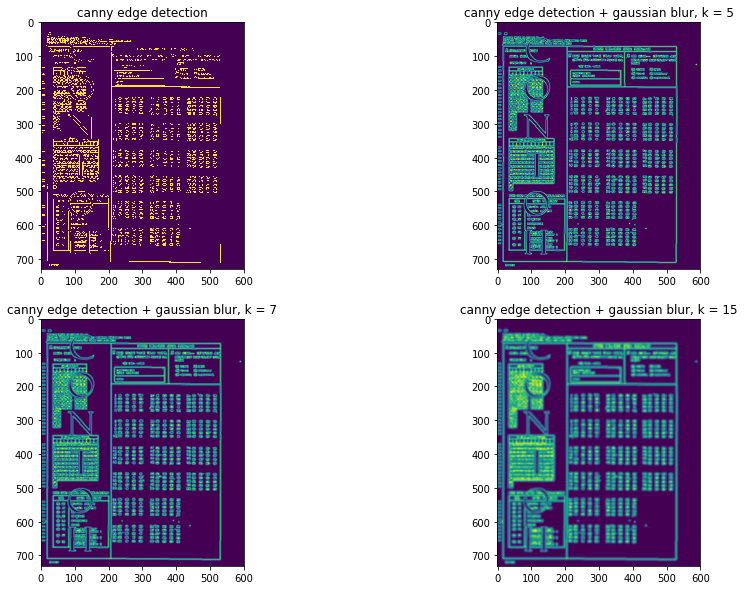

In [4]:
plt.figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.imshow(canny(image, 50, 150))
plt.title('canny edge detection')

plt.subplot(2, 2, 2)
plt.imshow(gaussian_blur(canny(image, 50, 150),5))
plt.title('canny edge detection + gaussian blur, k = 5')

plt.subplot(2, 2, 3)
plt.imshow(gaussian_blur(canny(image, 50, 150),7))
plt.title('canny edge detection + gaussian blur, k = 7')

plt.subplot(2, 2, 4)
plt.imshow(gaussian_blur(canny(image, 50, 150),15))
plt.title('canny edge detection + gaussian blur, k = 15')
plt.show()

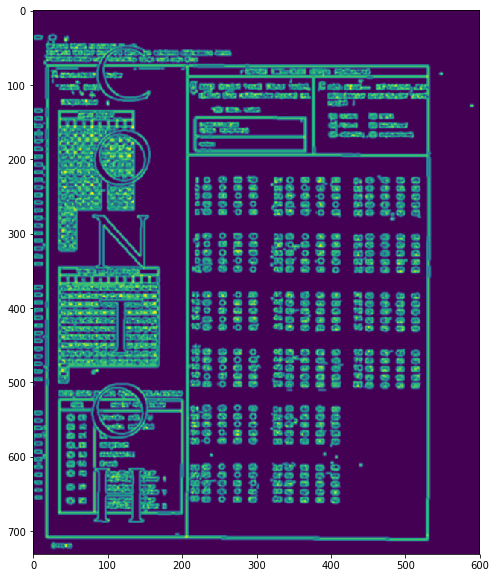

In [5]:
plt.figure(figsize=(8,10))
plt.imshow(gaussian_blur(canny(image, 50, 100),5))
plt.show()

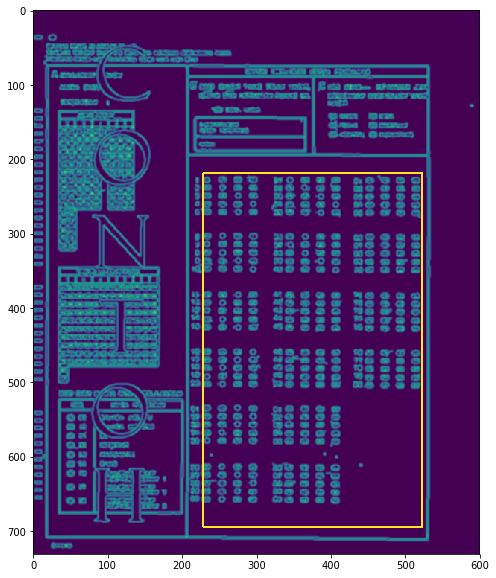

In [6]:
rows, cols   = image.shape[:2]
bottom_left  = [int(cols*0.38), int(rows*0.95)]
top_left     = [int(cols*0.38), int(rows*0.3)]
bottom_right = [int(cols*0.87), int(rows*0.95)]
top_right    = [int(cols*0.87), int(rows*0.3)]
gaussian_5 = gaussian_blur(canny(image, 50, 150),5)
copied = np.copy(gaussian_5)
cv2.line(copied, tuple(bottom_left), tuple(bottom_right), (255,0,0), 2)
cv2.line(copied, tuple(bottom_left), tuple(top_left), (255,0,0), 2)
cv2.line(copied, tuple(top_left), tuple(top_right), (255,0,0), 2)
cv2.line(copied, tuple(top_right), tuple(bottom_right), (255,0,0), 2)
plt.figure(figsize=(8,10))
plt.imshow(copied)
plt.show()

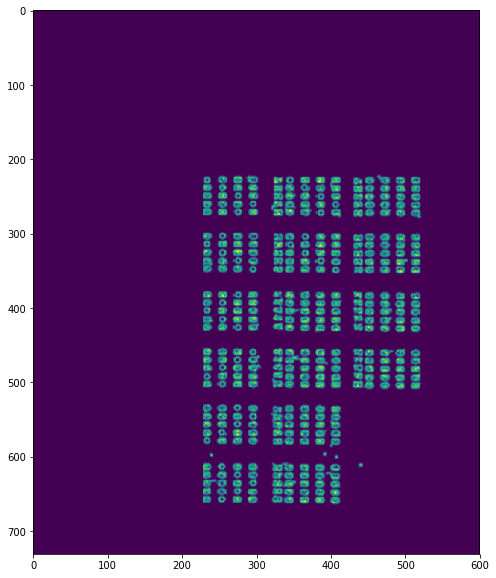

In [7]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)   
    if len(img.shape) > 2:
        channel_count = img.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
         
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
plt.figure(figsize=(8,10))
copied = np.copy(gaussian_5)
vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
interested = region_of_interest(copied, vertices)
plt.imshow(interested)
plt.show()

In [8]:
def draw_lines(img, lines, color = [255, 0, 0], thickness = 2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength = min_line_len, maxLineGap = max_line_gap)
    line_img = np.zeros(img.shape, dtype=np.uint8)
    draw_lines(line_img, lines)
    return lines, line_img

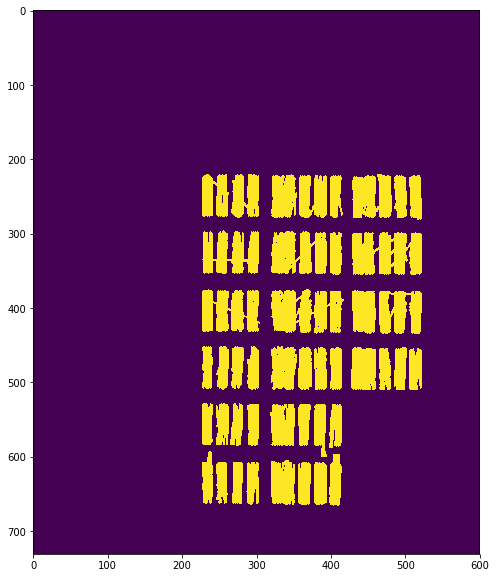

In [9]:
rho = 1
theta = np.pi / 360 
threshold = 10
min_line_length = 30
max_line_gap = 8
lines,image_lines = hough_lines(interested, rho, theta,threshold,min_line_length,max_line_gap)
plt.figure(figsize=(8,10))
plt.imshow(image_lines)
plt.show()

In [10]:
Ys, Xs = [], []
for line in lines:
    for x1,y1,x2,y2 in line:
        Ys.append(y1)
        Xs.append(x1)

In [31]:
def skipping_after(arr,SKIP,AFTER):
    skips, counts = SKIP, 0
    returns = []
    for i in arr:
        if skips == 0:
            counts = 0
            skips = SKIP
        if counts < AFTER:
            returns.append(i)
        else:
            skips -= 1
        counts += 1
    return returns
def get_yangdisitu(img,img2,x,y):
    x1 = x-2 
    x2 = x+4 
    y1 = y-2
    y2 = y+4
    
    roi = img[x1:x2,y1:y2]
    M = cv2.moments(roi)
    cv2.rectangle(img2,(x1,y1),(x2,y2),(0,255,0),1)
    total = int(M['m00'])#get blackpixel ??
    return total
    


1 ( a )   9013 : x  232  , y  226
1 ( b )   8836 : x  252  , y  226
1 ( c )   8642 : x  272  , y  226
1 ( d )   9103 : x  292  , y  226
2 ( a )   8628 : x  232  , y  237
2 ( b )   8573 : x  252  , y  237
2 ( c )   8311 : x  272  , y  237
2 ( d )   9108 : x  292  , y  237
3 ( a )   8852 : x  232  , y  248
3 ( b )   8754 : x  252  , y  248
3 ( c )   8467 : x  272  , y  248
3 ( d )   9097 : x  292  , y  248
4 ( a )   8889 : x  232  , y  259
4 ( b )   8787 : x  252  , y  259
4 ( c )   8504 : x  272  , y  259
4 ( d )   9106 : x  292  , y  259
5 ( a )   8652 : x  232  , y  270
5 ( b )   7893 : x  252  , y  270
5 ( c )   6713 : x  272  , y  270
5 ( d )   9108 : x  292  , y  270

newX  12 
 [232 252 272 292 347 367 387 407 452 472 492 512]

newY  30 
 [226, 237, 248, 259, 270, 303, 314, 325, 336, 347, 380, 391, 402, 413, 424, 457, 468, 479, 490, 501, 534, 545, 556, 567, 578, 611, 622, 633, 644, 655]


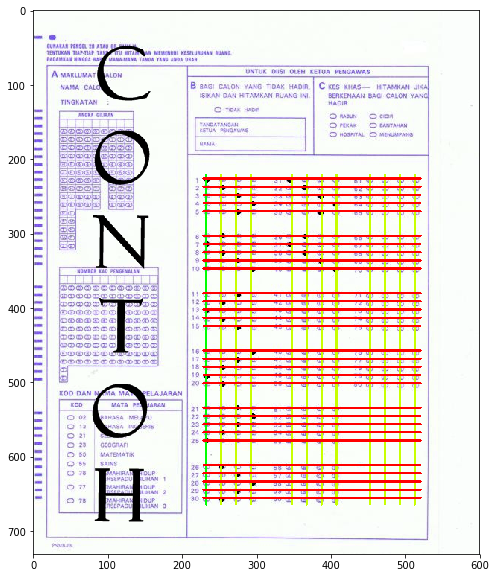

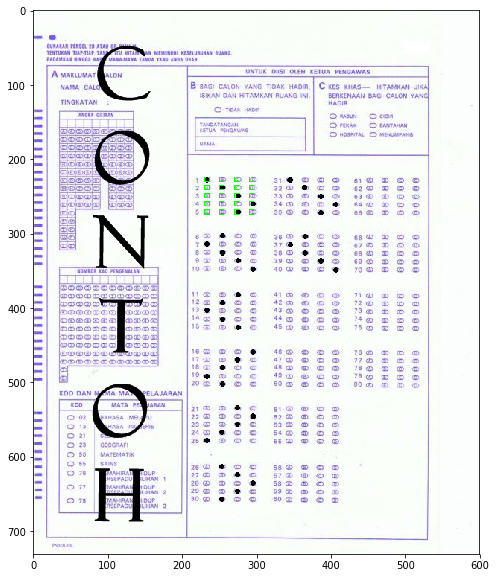

In [36]:
min_y, max_y = min(Ys), max(Ys)

copied = np.copy(image)
tgokrect = image.copy()
gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
ret,thresh1 = cv2.threshold(gray,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)


lines_y = np.arange(np.unique(Xs)[4],np.unique(Xs)[-1],20)[[0,1,2,3,6,7,8,9,11,12,13,14]]
lines_y[[4,5,6,7]] = lines_y[[4,5,6,7]] - 5
# test line cv2.line(copied, (232, min_y), (232, max_y), (0,0,255), 2)  
k = 0
#lines_y ni contained value X-point .. nk create vertical line
newX = lines_y
for i in lines_y:
    if (k==0):
        cv2.line(copied, (i, min_y), (i, max_y), (0,255,0), 2)
    else:
        cv2.line(copied, (i, min_y), (i, max_y), (200,255,0), 2)
    k = k +1 

min_x, max_x = min(Xs), max(Xs)
l = 0
newY=[]
for i in skipping_after(np.arange(np.unique(Ys)[5],max(Ys),11),2,5):
    newY.append(i)
    cv2.line(copied, (min_x, i), (max_x, i), (255,0,0), 2)
    l = 1 + l





#232,226 1(A) roi1
#252,226 1(B) roi2
#272,248 3(C) roi3
#292,259 4(D) roi4
#232,270 5(A) roi5
#272,237 2(C) roi6
#
# x1,y1--------
# |           |
# |           |
# --------x2,y2
#
"""roi1 = gray[231:234,225:226]
roi2 = gray[251:254,225:226]
roi3 = gray[271:274,247:248]
roi4 = gray[291:294,258:259]
roi5 = gray[231:234,269:270]
roi6 = gray[271:274,236:237]

print("Print np.sum of rectangle on intercepted line ")
print(roi1)
np_sum = np.sum(roi1)
print("roi 1 np.sum ->", np_sum)

np_sum = np.sum(roi2)
print(roi2)
print("roi 2 np_sum ->", np_sum)

np_sum = np.sum(roi3)
print(roi3)
print("roi 3 np_sum ->", np_sum)

np_sum = np.sum(roi4)
print(roi4)
print("roi 4 np_sum ->", np_sum)

np_sum = np.sum(roi5)
print(roi5)
print("roi 5 np_sum ->", np_sum)

np_sum = np.sum(roi6)
print(roi6)
print("roi 6 np_sum ->", np_sum)

---ni output-- 
Print np.sum of rectangle on intercepted line 
[[255]
 [246]
 [254]]
roi 1 np.sum -> 755
[[241]
 [252]
 [253]]
roi 2 np_sum -> 746
[[251]
 [252]
 [252]]
roi 3 np_sum -> 755
[[253]
 [253]
 [253]]
roi 4 np_sum -> 759
[[237]
 [247]
 [245]]
roi 5 np_sum -> 729
[[245]
 [213]
 [164]]
roi 6 np_sum -> 622

"""
abcd = ["a","b","c","d"]
c = 0
justnumber = []
for i in range(5):
    for u in range(4):
        x = newX[u]
        y = newY[i]
        
        justnumber.append(get_yangdisitu(gray,tgokrect,x,y))
        print(i + 1,"(",abcd[u],")", " ", justnumber[c], ": x ",x," , y ",y)
        c = c + 1


    


print("\nnewX ",len(newX),"\n" ,newX)
print("\nnewY ",len(newY),"\n" ,newY)

plt.figure(figsize=(8,10))
plt.imshow(copied)
plt.figure(figsize=(8,10))
plt.imshow(tgokrect)
plt.show()